In this notebook we read a toy dataset and perform basic data cleaning and lexical analysis. 

## Contents

* [Read the dataset](#datasetreading)
* [Data Cleaning](#regex)
* [Stemming & Lemmatization](#stemming)
* [Tokenization](#tokenization)
* [Stop word removal](#stopword)

<a id='datasetreading'></a>

### Read the dataset

The dataset is collected from https://www.kaggle.com/c/medical-notes/data. It contains 800 anonymised transcribed medical reports with the disease category (specialty). For more information browse original source - https://www.mtsamples.com/

In [1]:
import os
import pandas as pd
from tqdm import tqdm

pd.options.display.max_colwidth = -1

In [2]:
# We read all the medical notes from the directory
dir = 'medical_notes/'
print ("Total {} files in directory".format(len(os.listdir(dir))))

Total 1239 files in directory


In [3]:
labels = pd.read_csv("trainLabels.csv",header=None)
labels.columns = ['file','label']

In [4]:
print (labels.head(5))

       file       label
0  1001.txt  Neurology 
1  1002.txt  Orthopedic
2  1003.txt  Orthopedic
3  1004.txt  Radiology 
4  1005.txt  Orthopedic


In [5]:
# read each medical notes and the corresponding label (disease category)
texts = []
classes = []

for i in tqdm(range(labels.shape[0])):
    filename = os.path.join(dir,labels.iloc[i]['file'])
    text = " ".join(open(filename,'r').readlines())
    texts.append(text)
    classes.append(labels.iloc[i]['label'])
    
data = pd.DataFrame()
data['text'] = texts
data['label'] = classes

100%|███████████████████████████████████████████████████████████████████████████████| 826/826 [00:02<00:00, 344.37it/s]


In [6]:
print (data.shape)

(826, 2)


In [7]:
data.head(5)

text  \
0  \n \n \n \n \n <B>CC:</B> Difficulty with word finding.\n \n <B>HX: </B>This 27y/o RHF experienced sudden onset word finding difficulty and slurred speech on the evening of 2/19/96. She denied any associated dysphagia, diplopia, numbness or weakness of her extremities. She went to sleep with her symptoms on 2/19/96, and awoke with them on 2/20/96. She also awoke with a headache (HA) and mild neck stiffness. She took a shower and her HA and neck stiffness resolved. Throughout the day she continued to have difficulty with word finding and had worsening of her slurred speech. That evening, she began to experience numbness and weakness in the lower right face. She felt like there was a &quot;rubber-band&quot; wrapped around her tongue.\n \n For 3 weeks prior to presentation, she experienced transient episodes of a &quot;boomerang&quot; shaped field cut in the left eye. The episodes were not associated with any other symptoms. One week prior to presentation, she went to a local ER for menorrhagia. She had just resumed taking oral birth control pills one week prior to the ER visit after having stopped their use for several months. Local evaluation included an unremarkable carotid duplex scan. However, a HCT with and without contrast reportedly revealed a left frontal gyriform enhancing lesion. An MRI brain scan on 2/20/96 revealed nonspecific white matter changes in the right periventricular region. EEG reportedly showed diffuse slowing. CRP was reportedly &quot;too high&quot; to calibrate.\n \n <B>MEDS:</B> Ortho-Novum 7-7-7 (started 2/3/96), and ASA (started 2/20/96).\n \n <B>PMH:</B> 1)ventral hernia repair 10 years ago, 2)mild &quot;concussion&quot; suffered during a MVA; without loss of consciousness, 5/93, 3) Anxiety disorder, 4) One childbirth.\n \n <B>FHX: </B>She did not know her father and was not in contact with her mother.\n \n <B>SHX:</B> Lives with boyfriend. Smokes one pack of cigarettes every three days and has done so for 10 years. Consumes 6 bottles of beers, one day a week. Unemployed and formerly worked at an herbicide plant.\n \n <B>EXAM: </B>BP150/79, HR77, RR22, 37.4C.\n \n MS: A&O to person, place and time. Speech was dysarthric with mild decreased fluency marked by occasional phonemic paraphasic errors. Comprehension, naming and reading were intact. She was able to repeat, though her repetition was occasionally marked by phonemic paraphasic errors. She had no difficulty with calculation.\n \n CN: VFFTC, Pupils 5/5 decreasing to 3/3. EOM intact. No papilledema or hemorrhages seen on fundoscopy. No RAPD or INO. There was right lower facial weakness. Facial sensation was intact, bilaterally. The rest of the CN exam was unremarkable.\n \n MOTOR: 5/5 strength throughout with normal muscle bulk and tone.\n \n Sensory: No deficits.\n \n Coord/Station/Gait: unremarkable.\n \n Reflexes 2/2 throughout. Plantar responses were flexor, bilaterally.\n \n Gen Exam: unremarkable.\n \n <B>COURSE:</B> CRP 1.2 (elevated), ESR 10, RF 20, ANA 1:40, ANCA &lt;1:40, TSH 2.0, FT4 1.73, Anticardiolipin antibody IgM 10.8GPL units (normal &lt;10.9), Anticardiolipin antibody IgG 14.8GPL (normal&lt;22.9), SSA and SSB were normal. Urine beta-hCG pregnancy and drug screen were negative. EKG, CXR and UA were negative.\n \n MRI brain, 2/21/96 revealed increased signal on T2 imaging in the periventricular white matter region of the right hemisphere. In addition, there were subtle T2 signal changes in the right frontal, right parietal, and left parietal regions as seen previously on her local MRI can. In addition, special FLAIR imaging showed increased signal in the right frontal region consistent with ischemia.\n \n She underwent Cerebral Angiography on 2/22/96. This revealed decreased flow and vessel narrowing the candelabra branches of the RMCA supplying the right frontal lobe. These changes corresponded to the areas of ischemic changes seen on MRI. There was also segmental narrowing of the caliber of the vessels in the circle of

<a id='regex'></a>

### Basic data cleaning

Natural language in its pure form can bring lot of noise. We need to clean the data in order to use any statistical/machine learning model. Below are the few techniques for cleaning the text data.

* Using RegEx (regular expressions) to identify the irrelevant text sections for removal
* Standardizing/normalizing texts like - abbreviations, spelling mistakes
* For social media data - remove smileys, email ids if these information are not relevant for downstream analysis


In [8]:
sample_text = data.text.iloc[1]
print (sample_text)


 
 
 
 
 <B>PREOPERATIVE DIAGNOSIS: </B> Ganglion of the left wrist.
 
 <B>POSTOPERATIVE DIAGNOSIS: </B> Ganglion of the left wrist.
 
 <B>OPERATION: </B> Excision of ganglion.
 
 <B>ANESTHESIA: </B> General.
 
 <B>ESTIMATED BLOOD LOSS: </B> Less than 5 mL.
 
 <B>OPERATION: </B> After a successful anesthetic, the patient was positioned on the operating table.  A tourniquet applied to the upper arm.  The extremity was prepped in a usual manner for a surgical procedure and draped off.  The superficial vessels were exsanguinated with an elastic wrap and the tourniquet was then inflated to the usual arm pressure.  A curved incision was made over the presenting ganglion over the dorsal aspect of the wrist.  By blunt and sharp dissection, it was dissected out from underneath the extensor tendons and the stalk appeared to arise from the distal radiocapitellar joint and the dorsal capsule was excised along with the ganglion and the specimen was removed and submitted.  The small superficial ve

In [9]:
import re

We remove all the special characters like - "\n", HTML tags from the texts

In [10]:
def remove_html(text):
    text = text.replace("\n"," ")
    pattern = re.compile('<.*?>') #all the HTML tags
    return pattern.sub(r'', text)

In [11]:
sample_text_processed = remove_html(sample_text)
print (sample_text_processed)

          PREOPERATIVE DIAGNOSIS:  Ganglion of the left wrist.    POSTOPERATIVE DIAGNOSIS:  Ganglion of the left wrist.    OPERATION:  Excision of ganglion.    ANESTHESIA:  General.    ESTIMATED BLOOD LOSS:  Less than 5 mL.    OPERATION:  After a successful anesthetic, the patient was positioned on the operating table.  A tourniquet applied to the upper arm.  The extremity was prepped in a usual manner for a surgical procedure and draped off.  The superficial vessels were exsanguinated with an elastic wrap and the tourniquet was then inflated to the usual arm pressure.  A curved incision was made over the presenting ganglion over the dorsal aspect of the wrist.  By blunt and sharp dissection, it was dissected out from underneath the extensor tendons and the stalk appeared to arise from the distal radiocapitellar joint and the dorsal capsule was excised along with the ganglion and the specimen was removed and submitted.  The small superficial vessels were electrocoagulated and instilled

Remove all the headings from text

In [12]:
def remove_headings(text):
    pattern = re.compile('\w+:')
    return pattern.sub(r'', text)

In [13]:
sample_text_processed = remove_headings(sample_text_processed)
print (sample_text_processed)

          PREOPERATIVE   Ganglion of the left wrist.    POSTOPERATIVE   Ganglion of the left wrist.      Excision of ganglion.      General.    ESTIMATED BLOOD   Less than 5 mL.      After a successful anesthetic, the patient was positioned on the operating table.  A tourniquet applied to the upper arm.  The extremity was prepped in a usual manner for a surgical procedure and draped off.  The superficial vessels were exsanguinated with an elastic wrap and the tourniquet was then inflated to the usual arm pressure.  A curved incision was made over the presenting ganglion over the dorsal aspect of the wrist.  By blunt and sharp dissection, it was dissected out from underneath the extensor tendons and the stalk appeared to arise from the distal radiocapitellar joint and the dorsal capsule was excised along with the ganglion and the specimen was removed and submitted.  The small superficial vessels were electrocoagulated and instilled after closing the skin with 4-0 Prolene, into the area 

Remove &quot marks and other characters. Replace multiple spaces with single space

In [14]:
def replace_mult_spaces(text):
    text = text.replace("&quot","")
    pattern = re.compile(' +')
    text = pattern.sub(r' ', text)
    text = text.strip()
    return text

In [15]:
sample_text_processed = replace_mult_spaces(sample_text_processed)
print (sample_text_processed)

PREOPERATIVE Ganglion of the left wrist. POSTOPERATIVE Ganglion of the left wrist. Excision of ganglion. General. ESTIMATED BLOOD Less than 5 mL. After a successful anesthetic, the patient was positioned on the operating table. A tourniquet applied to the upper arm. The extremity was prepped in a usual manner for a surgical procedure and draped off. The superficial vessels were exsanguinated with an elastic wrap and the tourniquet was then inflated to the usual arm pressure. A curved incision was made over the presenting ganglion over the dorsal aspect of the wrist. By blunt and sharp dissection, it was dissected out from underneath the extensor tendons and the stalk appeared to arise from the distal radiocapitellar joint and the dorsal capsule was excised along with the ganglion and the specimen was removed and submitted. The small superficial vessels were electrocoagulated and instilled after closing the skin with 4-0 Prolene, into the area was approximately 6 to 7 mL of 0.25 Marcain

remove multiple consecutive spaces and replace with single space

In [16]:
def replace_other_chars(text):
    pattern = re.compile(r'[()!@&;]')
    text = pattern.sub(r'', text)
    return text

In [17]:
sample_text_processed = replace_other_chars(sample_text_processed)
print (sample_text_processed)

PREOPERATIVE Ganglion of the left wrist. POSTOPERATIVE Ganglion of the left wrist. Excision of ganglion. General. ESTIMATED BLOOD Less than 5 mL. After a successful anesthetic, the patient was positioned on the operating table. A tourniquet applied to the upper arm. The extremity was prepped in a usual manner for a surgical procedure and draped off. The superficial vessels were exsanguinated with an elastic wrap and the tourniquet was then inflated to the usual arm pressure. A curved incision was made over the presenting ganglion over the dorsal aspect of the wrist. By blunt and sharp dissection, it was dissected out from underneath the extensor tendons and the stalk appeared to arise from the distal radiocapitellar joint and the dorsal capsule was excised along with the ganglion and the specimen was removed and submitted. The small superficial vessels were electrocoagulated and instilled after closing the skin with 4-0 Prolene, into the area was approximately 6 to 7 mL of 0.25 Marcain

Putting everything together in a function and apply the cleaning on all the texts. Further, convert everything into lower case.

In [18]:
def clean_text(text):
    text = remove_html(text)
    text = remove_headings(text)
    text = replace_mult_spaces(text)
    text = replace_other_chars(text)
    text = text.lower()
    return text

In [19]:
data['clean_text'] = data.text.apply(clean_text)

<a id='eda'></a>

### Basic descriptive analysis on the texts

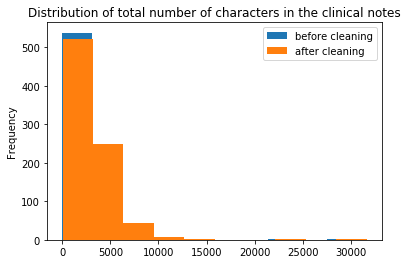

In [20]:
import matplotlib.pyplot as plt

data.clean_text.apply(len).plot.hist()
data.text.apply(len).plot.hist()
plt.title("Distribution of total number of characters in the clinical notes")
plt.legend(["before cleaning","after cleaning"])
plt.show()

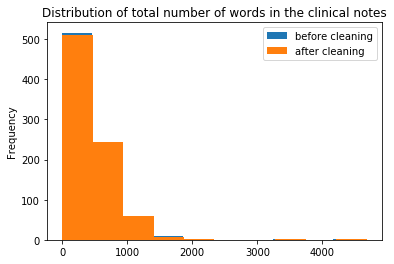

In [21]:
data.clean_text.apply(lambda x: len(x.split())).plot.hist()
data.text.apply(lambda x: len(x.split())).plot.hist()
plt.title("Distribution of total number of words in the clinical notes")
plt.legend(["before cleaning","after cleaning"])
plt.show()

<a id='stemming'></a>

### Stemming and Lemmatization

Stemming changes word into its root stem. 

<img src = https://miro.medium.com/max/359/1*l65c30sY9fQsWPKIckqmCQ.png>

However, the root stem may not be lexicographically a correct word. Lemmatization on the other hand standardizes a word into its root word. Lemmatization deals with higher level of abstraction.

<img src = https://devopedia.org/images/article/227/6785.1570815200.png>


In [22]:
sample_text = data.clean_text.iloc[1]
print (sample_text)

preoperative ganglion of the left wrist. postoperative ganglion of the left wrist. excision of ganglion. general. estimated blood less than 5 ml. after a successful anesthetic, the patient was positioned on the operating table. a tourniquet applied to the upper arm. the extremity was prepped in a usual manner for a surgical procedure and draped off. the superficial vessels were exsanguinated with an elastic wrap and the tourniquet was then inflated to the usual arm pressure. a curved incision was made over the presenting ganglion over the dorsal aspect of the wrist. by blunt and sharp dissection, it was dissected out from underneath the extensor tendons and the stalk appeared to arise from the distal radiocapitellar joint and the dorsal capsule was excised along with the ganglion and the specimen was removed and submitted. the small superficial vessels were electrocoagulated and instilled after closing the skin with 4-0 prolene, into the area was approximately 6 to 7 ml of 0.25 marcain

In [23]:
import nltk

def simple_stemmer(text):
    ps = nltk.stem.SnowballStemmer('english')
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

In [36]:
simple_stemmer("meeting")

'meet'

In [24]:
stemmed_text = simple_stemmer(sample_text)
print (stemmed_text)

preoper ganglion of the left wrist. postop ganglion of the left wrist. excis of ganglion. general. estim blood less than 5 ml. after a success anesthetic, the patient was posit on the oper table. a tourniquet appli to the upper arm. the extrem was prep in a usual manner for a surgic procedur and drape off. the superfici vessel were exsanguin with an elast wrap and the tourniquet was then inflat to the usual arm pressure. a curv incis was made over the present ganglion over the dorsal aspect of the wrist. by blunt and sharp dissection, it was dissect out from underneath the extensor tendon and the stalk appear to aris from the distal radiocapitellar joint and the dorsal capsul was excis along with the ganglion and the specimen was remov and submitted. the small superfici vessel were electrocoagul and instil after close the skin with 4-0 prolene, into the area was approxim 6 to 7 ml of 0.25 marcain with epinephrine. a jackson-pratt drain was insert and then after the tourniquet was relea

In [25]:
import spacy
import en_core_med7_lg #en_core_web_sm

nlp = spacy.load('en_core_med7_lg', parse=True, tag=True, entity=True)

def simple_lemmatizer(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [26]:
lemmatized_text = simple_lemmatizer(sample_text)
print (lemmatized_text)

preoperative ganglion of the left wrist . postoperative ganglion of the left wrist . excision of ganglion . general . estimate blood less than 5 ml . after a successful anesthetic , the patient be position on the operating table . a tourniquet apply to the upper arm . the extremity be preppe in a usual manner for a surgical procedure and drape off . the superficial vessel be exsanguinate with an elastic wrap and the tourniquet be then inflate to the usual arm pressure . a curved incision be make over the present ganglion over the dorsal aspect of the wrist . by blunt and sharp dissection , it be dissect out from underneath the extensor tendon and the stalk appear to arise from the distal radiocapitellar joint and the dorsal capsule be excise along with the ganglion and the specimen be remove and submit . the small superficial vessel be electrocoagulate and instill after close the skin with 4 - 0 prolene , into the area be approximately 6 to 7 ml of 0.25 marcaine with epinephrine . a ja

<a id='tokenization'></a>

### Tokenization

Tokenization splits a text into tokens or, words. Typically, words are splitted based on blank spaces. But tokenizations can also split words joined by other characters.

In [37]:
sample_text.split()

['preoperative',
 'ganglion',
 'of',
 'the',
 'left',
 'wrist.',
 'postoperative',
 'ganglion',
 'of',
 'the',
 'left',
 'wrist.',
 'excision',
 'of',
 'ganglion.',
 'general.',
 'estimated',
 'blood',
 'less',
 'than',
 '5',
 'ml.',
 'after',
 'a',
 'successful',
 'anesthetic,',
 'the',
 'patient',
 'was',
 'positioned',
 'on',
 'the',
 'operating',
 'table.',
 'a',
 'tourniquet',
 'applied',
 'to',
 'the',
 'upper',
 'arm.',
 'the',
 'extremity',
 'was',
 'prepped',
 'in',
 'a',
 'usual',
 'manner',
 'for',
 'a',
 'surgical',
 'procedure',
 'and',
 'draped',
 'off.',
 'the',
 'superficial',
 'vessels',
 'were',
 'exsanguinated',
 'with',
 'an',
 'elastic',
 'wrap',
 'and',
 'the',
 'tourniquet',
 'was',
 'then',
 'inflated',
 'to',
 'the',
 'usual',
 'arm',
 'pressure.',
 'a',
 'curved',
 'incision',
 'was',
 'made',
 'over',
 'the',
 'presenting',
 'ganglion',
 'over',
 'the',
 'dorsal',
 'aspect',
 'of',
 'the',
 'wrist.',
 'by',
 'blunt',
 'and',
 'sharp',
 'dissection,',
 'it',
 

In [27]:
sample_text = data.clean_text.iloc[1]
doc = nlp(sample_text)
for token in doc:
    print(token.text, token.pos_)

preoperative ADJ
ganglion NOUN
of ADP
the DET
left ADJ
wrist NOUN
. PUNCT
postoperative ADJ
ganglion NOUN
of ADP
the DET
left ADJ
wrist NOUN
. PUNCT
excision NOUN
of ADP
ganglion NOUN
. PUNCT
general PROPN
. PUNCT
estimated VERB
blood NOUN
less ADJ
than SCONJ
5 NUM
ml NOUN
. PUNCT
after ADP
a DET
successful ADJ
anesthetic NOUN
, PUNCT
the DET
patient NOUN
was AUX
positioned VERB
on ADP
the DET
operating NOUN
table NOUN
. PUNCT
a DET
tourniquet NOUN
applied VERB
to ADP
the DET
upper ADJ
arm NOUN
. PUNCT
the DET
extremity NOUN
was AUX
prepped VERB
in ADP
a DET
usual ADJ
manner NOUN
for ADP
a DET
surgical ADJ
procedure NOUN
and CCONJ
draped VERB
off ADP
. PUNCT
the DET
superficial ADJ
vessels NOUN
were AUX
exsanguinated VERB
with ADP
an DET
elastic ADJ
wrap NOUN
and CCONJ
the DET
tourniquet NOUN
was AUX
then ADV
inflated VERB
to ADP
the DET
usual ADJ
arm NOUN
pressure NOUN
. PUNCT
a DET
curved ADJ
incision NOUN
was AUX
made VERB
over ADP
the DET
presenting VERB
ganglion NOUN
over ADP
the 

<a id='stopword'></a>

### Stop word removal

Let us first see the most frequent words in the dataset

In [28]:
pd.Series(" ".join(data.clean_text.values).split()).value_counts().head(20)

the        25097
and        13490
was        11400
of         10042
to         8007 
a          6586 
with       5734 
in         5245 
is         3990 
patient    3013 
were       2665 
she        2632 
no         2612 
on         2588 
for        2533 
he         2322 
at         2222 
this       2147 
there      2041 
then       1995 
dtype: int64

Top 10 words based on frequency are english words like - articles, conjuctions, prepositions etc. These words often do not play in significant roles in the downstream applications. We need to remove these words to reduce the model complexity.

In [29]:
stopword_list = nltk.corpus.stopwords.words('english')

print (stopword_list[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [30]:
def lemmatize_and_remove_stopwords(text):
    doc = nlp(text)
    tokens = [word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in doc]
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [31]:
sample_text

'preoperative ganglion of the left wrist. postoperative ganglion of the left wrist. excision of ganglion. general. estimated blood less than 5 ml. after a successful anesthetic, the patient was positioned on the operating table. a tourniquet applied to the upper arm. the extremity was prepped in a usual manner for a surgical procedure and draped off. the superficial vessels were exsanguinated with an elastic wrap and the tourniquet was then inflated to the usual arm pressure. a curved incision was made over the presenting ganglion over the dorsal aspect of the wrist. by blunt and sharp dissection, it was dissected out from underneath the extensor tendons and the stalk appeared to arise from the distal radiocapitellar joint and the dorsal capsule was excised along with the ganglion and the specimen was removed and submitted. the small superficial vessels were electrocoagulated and instilled after closing the skin with 4-0 prolene, into the area was approximately 6 to 7 ml of 0.25 marcai

In [32]:
sample_text_processed = lemmatize_and_remove_stopwords(sample_text)
print (sample_text_processed)

preoperative ganglion left wrist . postoperative ganglion left wrist . excision ganglion . general . estimate blood less 5 ml . successful anesthetic , patient position operating table . tourniquet apply upper arm . extremity preppe usual manner surgical procedure drape . superficial vessel exsanguinate elastic wrap tourniquet inflate usual arm pressure . curved incision make present ganglion dorsal aspect wrist . blunt sharp dissection , dissect underneath extensor tendon stalk appear arise distal radiocapitellar joint dorsal capsule excise along ganglion specimen remove submit . small superficial vessel electrocoagulate instill close skin 4 - 0 prolene , area approximately 6 7 ml 0.25 marcaine epinephrine . jackson - pratt drain insert tourniquet release , keep deflate least 5 10 minute pass activate remove recovery room . dressing apply hand xeroform , 4x4s , abd , kerlix , elastic wrap volar fiberglass splint . tourniquet release . circulation return finger . patient allow awaken l

In [33]:
data.clean_text = data.clean_text.apply(lemmatize_and_remove_stopwords)

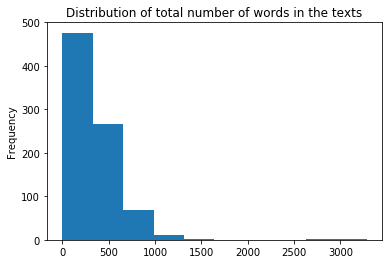

In [34]:
data.clean_text.apply(lambda x: len(x.split())).plot.hist()
plt.title("Distribution of total number of words in the texts")
plt.show()

In [35]:
data.to_csv("clinical_notes_cleaned.csv",index=False)

### References for further reading

<strong> NLP overview - </strong> https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72

<strong> Regular Expressions - </strong> https://regex101.com/ 

<strong> Spacy - </strong> https://spacy.io/usage/spacy-101

<strong> NLTK - </strong> https://www.nltk.org/book/

